## INTRODUCTION TO MACHINE LEARNING

In [62]:
import pandas as pd
import numpy as np
import quandl,math, datetime
from sklearn import preprocessing, svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [ ]:
quandl.ApiConfig.api_key = "mcseWdy4Juq_2h8ux3ss"
df = quandl.get("WIKI/GOOGL")
print(df.head())

In [ ]:
## Selecting feature variables from the dataset
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df

In [ ]:
## Getting the percent volatility for the day 
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
## Getting the stoke price percent change for the day
df['PCT_Change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df

In [ ]:
## Selecting new fearures that has a defined relationship to help simple linear regression have a better prediction
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume',]]
df

In [ ]:
# Selecting the label
forcast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.001*len(df)))
df['Label'] = df[forcast_col].shift(-forecast_out)
df.head()

In [ ]:
# Passing selected feature and label to X and y respectively
X = np.array(df.drop(['Label'],1))

In [ ]:
# Scaling X(feature) to have a common scale point across all the data piont
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]# grabs data for days ahead depending on the size of the df
X = X[:-forecast_out]# grabs data for the last days depending on the size of the df
df.dropna(inplace=True)
y = np.array(df['Label'])

In [ ]:
# Checking to see if data records across X and y are the same
print(len(X),len(y))

In [ ]:
# Split X and y to training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# Define our model classifier
clf = LinearRegression(n_jobs=-1) # (n_jobs: Number of jobs/threads that can be run at any given time)Tells how many trends you want the training to run under your CPU. (-1: run as many as you can)

#Fitting the training set to the classifier
clf.fit(X_train,y_train)

#save the mode to pickle
# with open('linerregression.pickle', 'wb') as f:
#     pickle.dump(clf,f)
    
pickle_in = open('linerregression.pickle','rb')
clf = pickle.load(pickle_in)

#Test our model with the test set
accuracy = clf.score(X_test,y_test)
accuracy

In [ ]:
#Predict pice fo the lately data
forecast_set = clf.predict(X_lately)
forecast_set

In [ ]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day #next day

In [ ]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

In [ ]:
df['Adj. Close'].plot()
df['Forecast'].plot(figsize=(30, 10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Building a linear regression from scratch

In [5]:
from statistics import mean
import random

In [6]:
# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,4,6,5,6,7], dtype=np.float64)


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1 
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
        
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)

In [7]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys) ) / ((mean(xs)**2) - mean(xs**2)) ) 
    b = (mean(ys)) - (m * mean(xs))
    return m,b

# Calculating the accuracy of the model wirh R^2 = 1 - [(Squared error of y-regression line) / ( Squared error of the y-mean)].

def squared_error(ys_orig,ys_lines):
    
    return sum((ys_lines-ys_orig)**2)

def coef_of_determ(ys_orig,ys_lines):
    y_mean_lines = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_lines)
    squared_error_y_mean = squared_error(ys_orig,y_mean_lines)
    return 1 - (squared_error_regr/squared_error_y_mean)

xs,ys = create_dataset(40,10,2,correlation='pos')

m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

2.1056285178236402 -2.059756097560985


In [8]:
regression_line = [(m*x)+b for x in xs]
# regression_line

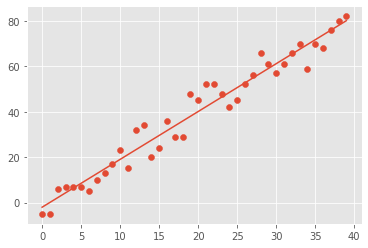

In [9]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [10]:
#predicting
predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coef_of_determ(ys,regression_line)
print(r_squared)

0.9551155466629501


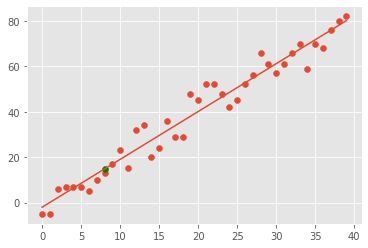

In [11]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color='green')
plt.plot(xs,regression_line)
plt.show()

In [33]:
##=================================================
# Concepts of KNN Classification

df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)
df.drop(['Unnamed: 11'],1,inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [34]:
df.columns

Index(['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
       'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli',
       'mitoses', 'class'],
      dtype='object')

In [35]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [37]:
clf = neighbors.KNeighborsClassifier()

In [38]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
clf.predict(X_test)
accuracy_score = clf.score(X_test,y_test)
accuracy_score

0.9785714285714285

In [40]:
example_measure = np.array([[2,4,2,3,4,5,1,2,2]])
example_measure = example_measure.reshape(len(example_measure),-1)
clf.predict(example_measure)

array([2], dtype=int64)

In [63]:
## Understanding KNN from scratch

from math import sqrt
from collections import Counter
import warnings

In [64]:
# plot_1 = [1,3]
# plot_2 = [2,5]

# eucld_distances = []
# for p1,p2 in zip(plot_1,plot_2):
#     print(p1,"=======",p2)
#     eucld_distance = (p1-p2)**2
#     eucld_distances.append(eucld_distance)
# euclidean_distance = sqrt(sum(eucld_distances))
# euclidean_distance


dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_feature = [5,7]

# [[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# plt.show()

In [65]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than total voting group")
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    return vote_result,confidence

In [66]:
result,confidence = k_nearest_neighbors(dataset,new_feature)
print(result,confidence)

[('r', 3)]
r 1.0


In [67]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)
df.drop(['Unnamed: 11'],1,inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)
full_data[:10]

[[5.0, 1.0, 1.0, 6.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [4.0, 8.0, 7.0, 10.0, 4.0, 10.0, 7.0, 5.0, 1.0, 4.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 6.0, 6.0, 4.0, 10.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 6.0, 10.0, 2.0, 10.0, 4.0, 1.0, 1.0, 4.0],
 [5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [10.0, 5.0, 7.0, 3.0, 3.0, 7.0, 3.0, 3.0, 8.0, 4.0]]

In [68]:
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [69]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [71]:
correct = 0
total = 0 

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set,data,k=5)
        if group == vote:
            correct += 1
        total += 1
        
correct/total

[(2, 5)]
[(2, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 4)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 3)]
[(2, 4)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 4)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 5)]
[(4, 3)]
[(4, 5)]
[(4, 3)]
[(4, 4)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[

0.9928057553956835